In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import sklearn
import imblearn

In [2]:
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV 

In [3]:
train= pd.read_csv("C:/Users/mahsa/Desktop/Raw data M&M V05- for python use.csv")

In [4]:
pip install pycaret

In [5]:
import pycaret

In [6]:
print('PyCaret: %s' % pycaret.__version__)

PyCaret: 2.3.6


In [7]:
data = train.sample(frac=0.68, random_state=50)
data_unseen = train.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (1052, 17)
Unseen Data For Predictions (495, 17)


In [8]:
train.head()

,Crystaline form,Core size,Hydrodynamic in W&M,Specific surface area,Polydispersity index,Zeta potential in W&M,Dosage,Assay,Assay measures,Duration,Percentage of DNA breakage,Number of cells,Control type,Cell name,Cell organ,Cell age,"Cell type (primary,carcinoma)"
0,anatase,21.0,NaN,50.0,NaN,NaN,0.0,comet,SSB-DSB,24.0,10.0,1670,copper,SH_SY5Y,bone marrow,young,carcinoma
1,anatase,21.0,NaN,50.0,NaN,NaN,2.4,comet,SSB-DSB,24.0,0.2,1670,copper,SH_SY5Y,bone marrow,young,carcinoma
2,anatase,21.0,NaN,50.0,NaN,NaN,24.0,comet,SSB-DSB,24.0,17.0,1670,copper,SH_SY5Y,bone marrow,young,carcinoma
3,anatase,21.0,NaN,50.0,NaN,NaN,240.0,comet,SSB-DSB,24.0,22.0,1670,copper,SH_SY5Y,bone marrow,young,carcinoma
4,anatase,21.0,NaN,50.0,NaN,NaN,0.0,comet,SSB-DSB,48.0,0.2,1670,copper,SH_SY5Y,bone marrow,young,carcinoma


In [9]:
pip install --user imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.pipeline import Pipeline  # revised
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

In [11]:
num_cols = ['Core size','Hydrodynamic in W&M','Specific surface area', 'Polydispersity index','Zeta potential in W&M', 'Dosage','Duration', 'Number of cells' ]
cat_cols = ['Crystaline form', 'Control type', 'Cell name', 'Cell organ', 'Cell age','Cell type (primary,carcinoma)']

In [12]:
numeric_features = num_cols # revised
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())])

In [13]:
categorical_features = cat_cols # revised
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot',OneHotEncoder(handle_unknown='error'))])

# adding the foloowing line
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])

In [14]:
clf = Pipeline(steps=[('preprocessor', preprocessor),('RandomForestRegressor',  RandomForestRegressor())])
clf.fit(train.drop('Percentage of DNA breakage', 1), train['Percentage of DNA breakage'])

clf.named_steps['preprocessor'].transformers_[1][1]\
   .named_steps['onehot'].get_feature_names(categorical_features)

array(['Crystaline form_anatase', 'Crystaline form_anatase/rutile',
       'Crystaline form_rutile', 'Control type_CP', 'Control type_H2O2',
       'Control type_KBrO3', 'Control type_Ro19-8022',
       'Control type_benzene', 'Control type_copper',
       'Control type_ethyl methane sulfonate', 'Control type_etoposide',
       'Control type_methyl methansulphonate ',
       'Control type_mitomycin-C', 'Control type_riboflavin',
       'Cell name_16_HBE', 'Cell name_A549', 'Cell name_BEAS_2B',
       'Cell name_Caco_2', 'Cell name_Cos_1', 'Cell name_HPLC',
       'Cell name_HepG2', 'Cell name_SH_SY5Y', 'Cell name_TK6',
       'Cell name_others', 'Cell organ_NA ', 'Cell organ_blood',
       'Cell organ_bone marrow', 'Cell organ_brain', 'Cell organ_embryo',
       'Cell organ_intestine', 'Cell organ_kidney', 'Cell organ_liver',
       'Cell organ_lung', 'Cell organ_others', 'Cell organ_spleen',
       'Cell age_adult', 'Cell age_fetus', 'Cell age_young',
       'Cell type (primary,carcin

In [15]:
column_transformer = ColumnTransformer([('scaler', MinMaxScaler(), ['Core size', 'Hydrodynamic in W&M','Specific surface area', 'Polydispersity index','Zeta potential in W&M', 'Dosage',  'Duration', 'Percentage of DNA breakage', 'Number of cells']) ])

In [16]:
column_transformer = ColumnTransformer([('one_hot', OneHotEncoder(), ['Crystaline form', 'Control type', 'Cell name', 'Cell organ', 'Cell age','Cell type (primary,carcinoma)']) ])

In [17]:
from pycaret.regression import *
reg1 = setup(train, target = 'Percentage of DNA breakage', normalize_method= 'zscore', preprocess=True, categorical_features = None, iterative_imputation_iters = 5, categorical_imputation = 'constant', categorical_iterative_imputer = 'lightgbm', numeric_features = None, numeric_imputation = 'mean', feature_selection= True, feature_selection_threshold = 0.8, numeric_iterative_imputer = 'lightgbm',fold_shuffle=True, session_id=2, log_experiment=True, )

,Description,Value
0,session_id,2
1,Target,Percentage of DNA breakage
2,Original Data,"(1547, 17)"
3,Missing Values,True
4,Numeric Features,8
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1082, 58)"


In [18]:
print(train.shape) 

(1547, 17)


In [19]:
grid = setup(data=train,target = 'Percentage of DNA breakage', html=False, silent=False, verbose=False)

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
Crystaline form,Categorical
Core size,Numeric
Hydrodynamic in W&M,Numeric
Specific surface area,Numeric
Polydispersity index,Numeric
Zeta potential in W&M,Numeric
Dosage,Numeric
Assay,Categorical
Assay measures,Categorical
Duration,Numeric


In [20]:
print(train.shape)

(1547, 17)


In [21]:
grid = setup(data=train, target = 'Percentage of DNA breakage', html=False, silent=True, verbose=False)

In [22]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,8.0784,154.9273,12.3909,0.1077,1.0529,4.9838,0.788


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,8.0030,153.5897,12.3361,0.1156,1.0439,4.9494,0.554
lr,Linear Regression,8.0784,154.9273,12.3909,0.1077,1.0529,4.9838,0.788


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,6.8496,104.1634,10.1518,0.3982,0.9072,3.1106,0.010
lasso,Lasso Regression,8.0030,153.5897,12.3361,0.1156,1.0439,4.9494,0.554
lr,Linear Regression,8.0784,154.9273,12.3909,0.1077,1.0529,4.9838,0.788


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,6.8496,104.1634,10.1518,0.3982,0.9072,3.1106,0.010
en,Elastic Net,7.9528,151.8153,12.2657,0.1256,1.0384,4.8822,0.010
lasso,Lasso Regression,8.0030,153.5897,12.3361,0.1156,1.0439,4.9494,0.554
lr,Linear Regression,8.0784,154.9273,12.3909,0.1077,1.0529,4.9838,0.788


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,6.849600e+00,1.041634e+02,1.015180e+01,3.982000e-01,0.9072,3.110600e+00,0.010
en,Elastic Net,7.952800e+00,1.518153e+02,1.226570e+01,1.256000e-01,1.0384,4.882200e+00,0.010
lasso,Lasso Regression,8.003000e+00,1.535897e+02,1.233610e+01,1.156000e-01,1.0439,4.949400e+00,0.554
lr,Linear Regression,8.078400e+00,1.549273e+02,1.239090e+01,1.077000e-01,1.0529,4.983800e+00,0.788
lar,Least Angle Regression,2.958509e+09,5.052641e+20,1.221358e+10,-3.272582e+18,12.3074,1.298820e+09,0.014


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,6.849600e+00,1.041634e+02,1.015180e+01,3.982000e-01,0.9072,3.110600e+00,0.010
en,Elastic Net,7.952800e+00,1.518153e+02,1.226570e+01,1.256000e-01,1.0384,4.882200e+00,0.010
lasso,Lasso Regression,8.003000e+00,1.535897e+02,1.233610e+01,1.156000e-01,1.0439,4.949400e+00,0.554
lr,Linear Regression,8.078400e+00,1.549273e+02,1.239090e+01,1.077000e-01,1.0529,4.983800e+00,0.788
llar,Lasso Least Angle Regression,8.730900e+00,1.727456e+02,1.311480e+01,-2.100000e-03,1.1242,5.773200e+00,0.008
lar,Least Angle Regression,2.958509e+09,5.052641e+20,1.221358e+10,-3.272582e+18,12.3074,1.298820e+09,0.014


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,6.849600e+00,1.041634e+02,1.015180e+01,3.982000e-01,0.9072,3.110600e+00,0.010
omp,Orthogonal Matching Pursuit,8.118300e+00,1.365722e+02,1.166840e+01,2.042000e-01,1.0138,4.733500e+00,0.012
en,Elastic Net,7.952800e+00,1.518153e+02,1.226570e+01,1.256000e-01,1.0384,4.882200e+00,0.010
lasso,Lasso Regression,8.003000e+00,1.535897e+02,1.233610e+01,1.156000e-01,1.0439,4.949400e+00,0.554
lr,Linear Regression,8.078400e+00,1.549273e+02,1.239090e+01,1.077000e-01,1.0529,4.983800e+00,0.788
llar,Lasso Least Angle Regression,8.730900e+00,1.727456e+02,1.311480e+01,-2.100000e-03,1.1242,5.773200e+00,0.008
lar,Least Angle Regression,2.958509e+09,5.052641e+20,1.221358e+10,-3.272582e+18,12.3074,1.298820e+09,0.014


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,6.849600e+00,1.041634e+02,1.015180e+01,3.982000e-01,0.9072,3.110600e+00,0.010
br,Bayesian Ridge,6.874400e+00,1.046080e+02,1.017440e+01,3.958000e-01,0.9097,3.146800e+00,0.012
omp,Orthogonal Matching Pursuit,8.118300e+00,1.365722e+02,1.166840e+01,2.042000e-01,1.0138,4.733500e+00,0.012
en,Elastic Net,7.952800e+00,1.518153e+02,1.226570e+01,1.256000e-01,1.0384,4.882200e+00,0.010
lasso,Lasso Regression,8.003000e+00,1.535897e+02,1.233610e+01,1.156000e-01,1.0439,4.949400e+00,0.554
lr,Linear Regression,8.078400e+00,1.549273e+02,1.239090e+01,1.077000e-01,1.0529,4.983800e+00,0.788
llar,Lasso Least Angle Regression,8.730900e+00,1.727456e+02,1.311480e+01,-2.100000e-03,1.1242,5.773200e+00,0.008
lar,Least Angle Regression,2.958509e+09,5.052641e+20,1.221358e+10,-3.272582e+18,12.3074,1.298820e+09,0.014


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,6.849600e+00,1.041634e+02,1.015180e+01,3.982000e-01,0.9072,3.110600e+00,0.010
br,Bayesian Ridge,6.874400e+00,1.046080e+02,1.017440e+01,3.958000e-01,0.9097,3.146800e+00,0.012
omp,Orthogonal Matching Pursuit,8.118300e+00,1.365722e+02,1.166840e+01,2.042000e-01,1.0138,4.733500e+00,0.012
en,Elastic Net,7.952800e+00,1.518153e+02,1.226570e+01,1.256000e-01,1.0384,4.882200e+00,0.010
lasso,Lasso Regression,8.003000e+00,1.535897e+02,1.233610e+01,1.156000e-01,1.0439,4.949400e+00,0.554
lr,Linear Regression,8.078400e+00,1.549273e+02,1.239090e+01,1.077000e-01,1.0529,4.983800e+00,0.788
llar,Lasso Least Angle Regression,8.730900e+00,1.727456e+02,1.311480e+01,-2.100000e-03,1.1242,5.773200e+00,0.008
par,Passive Aggressive Regressor,4.352595e+03,1.992938e+09,2.842031e+04,-1.292893e+07,2.3557,3.870332e+03,0.010
lar,Least Angle Regression,2.958509e+09,5.052641e+20,1.221358e+10,-3.272582e+18,12.3074,1.298820e+09,0.014


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,6.849600e+00,1.041634e+02,1.015180e+01,3.982000e-01,0.9072,3.110600e+00,0.010
br,Bayesian Ridge,6.874400e+00,1.046080e+02,1.017440e+01,3.958000e-01,0.9097,3.146800e+00,0.012
omp,Orthogonal Matching Pursuit,8.118300e+00,1.365722e+02,1.166840e+01,2.042000e-01,1.0138,4.733500e+00,0.012
en,Elastic Net,7.952800e+00,1.518153e+02,1.226570e+01,1.256000e-01,1.0384,4.882200e+00,0.010
lasso,Lasso Regression,8.003000e+00,1.535897e+02,1.233610e+01,1.156000e-01,1.0439,4.949400e+00,0.554
lr,Linear Regression,8.078400e+00,1.549273e+02,1.239090e+01,1.077000e-01,1.0529,4.983800e+00,0.788
llar,Lasso Least Angle Regression,8.730900e+00,1.727456e+02,1.311480e+01,-2.100000e-03,1.1242,5.773200e+00,0.008
huber,Huber Regressor,1.019470e+01,2.748801e+02,1.656620e+01,-6.083000e-01,1.9982,1.297200e+00,0.016
par,Passive Aggressive Regressor,4.352595e+03,1.992938e+09,2.842031e+04,-1.292893e+07,2.3557,3.870332e+03,0.010
lar,Least Angle Regression,2.958509e+09,5.052641e+20,1.221358e+10,-3.272582e+18,12.3074,1.298820e+09,0.014


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,6.849600e+00,1.041634e+02,1.015180e+01,3.982000e-01,0.9072,3.110600e+00,0.010
br,Bayesian Ridge,6.874400e+00,1.046080e+02,1.017440e+01,3.958000e-01,0.9097,3.146800e+00,0.012
knn,K Neighbors Regressor,6.450900e+00,1.309092e+02,1.132390e+01,2.532000e-01,0.8254,2.531900e+00,0.014
omp,Orthogonal Matching Pursuit,8.118300e+00,1.365722e+02,1.166840e+01,2.042000e-01,1.0138,4.733500e+00,0.012
en,Elastic Net,7.952800e+00,1.518153e+02,1.226570e+01,1.256000e-01,1.0384,4.882200e+00,0.010
lasso,Lasso Regression,8.003000e+00,1.535897e+02,1.233610e+01,1.156000e-01,1.0439,4.949400e+00,0.554
lr,Linear Regression,8.078400e+00,1.549273e+02,1.239090e+01,1.077000e-01,1.0529,4.983800e+00,0.788
llar,Lasso Least Angle Regression,8.730900e+00,1.727456e+02,1.311480e+01,-2.100000e-03,1.1242,5.773200e+00,0.008
huber,Huber Regressor,1.019470e+01,2.748801e+02,1.656620e+01,-6.083000e-01,1.9982,1.297200e+00,0.016
par,Passive Aggressive Regressor,4.352595e+03,1.992938e+09,2.842031e+04,-1.292893e+07,2.3557,3.870332e+03,0.010


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,4.190300e+00,7.876390e+01,8.765900e+00,5.484000e-01,0.6403,8.832000e-01,0.012
ridge,Ridge Regression,6.849600e+00,1.041634e+02,1.015180e+01,3.982000e-01,0.9072,3.110600e+00,0.010
br,Bayesian Ridge,6.874400e+00,1.046080e+02,1.017440e+01,3.958000e-01,0.9097,3.146800e+00,0.012
knn,K Neighbors Regressor,6.450900e+00,1.309092e+02,1.132390e+01,2.532000e-01,0.8254,2.531900e+00,0.014
omp,Orthogonal Matching Pursuit,8.118300e+00,1.365722e+02,1.166840e+01,2.042000e-01,1.0138,4.733500e+00,0.012
en,Elastic Net,7.952800e+00,1.518153e+02,1.226570e+01,1.256000e-01,1.0384,4.882200e+00,0.010
lasso,Lasso Regression,8.003000e+00,1.535897e+02,1.233610e+01,1.156000e-01,1.0439,4.949400e+00,0.554
lr,Linear Regression,8.078400e+00,1.549273e+02,1.239090e+01,1.077000e-01,1.0529,4.983800e+00,0.788
llar,Lasso Least Angle Regression,8.730900e+00,1.727456e+02,1.311480e+01,-2.100000e-03,1.1242,5.773200e+00,0.008
huber,Huber Regressor,1.019470e+01,2.748801e+02,1.656620e+01,-6.083000e-01,1.9982,1.297200e+00,0.016


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,3.778800e+00,5.957280e+01,7.541100e+00,6.636000e-01,0.5689,1.148900e+00,0.222
dt,Decision Tree Regressor,4.190300e+00,7.876390e+01,8.765900e+00,5.484000e-01,0.6403,8.832000e-01,0.012
ridge,Ridge Regression,6.849600e+00,1.041634e+02,1.015180e+01,3.982000e-01,0.9072,3.110600e+00,0.010
br,Bayesian Ridge,6.874400e+00,1.046080e+02,1.017440e+01,3.958000e-01,0.9097,3.146800e+00,0.012
knn,K Neighbors Regressor,6.450900e+00,1.309092e+02,1.132390e+01,2.532000e-01,0.8254,2.531900e+00,0.014
omp,Orthogonal Matching Pursuit,8.118300e+00,1.365722e+02,1.166840e+01,2.042000e-01,1.0138,4.733500e+00,0.012
en,Elastic Net,7.952800e+00,1.518153e+02,1.226570e+01,1.256000e-01,1.0384,4.882200e+00,0.010
lasso,Lasso Regression,8.003000e+00,1.535897e+02,1.233610e+01,1.156000e-01,1.0439,4.949400e+00,0.554
lr,Linear Regression,8.078400e+00,1.549273e+02,1.239090e+01,1.077000e-01,1.0529,4.983800e+00,0.788
llar,Lasso Least Angle Regression,8.730900e+00,1.727456e+02,1.311480e+01,-2.100000e-03,1.1242,5.773200e+00,0.008


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,3.778800e+00,5.957280e+01,7.541100e+00,6.636000e-01,0.5689,1.148900e+00,0.222
et,Extra Trees Regressor,3.776700e+00,6.664010e+01,8.004900e+00,6.189000e-01,0.5737,8.390000e-01,0.192
dt,Decision Tree Regressor,4.190300e+00,7.876390e+01,8.765900e+00,5.484000e-01,0.6403,8.832000e-01,0.012
ridge,Ridge Regression,6.849600e+00,1.041634e+02,1.015180e+01,3.982000e-01,0.9072,3.110600e+00,0.010
br,Bayesian Ridge,6.874400e+00,1.046080e+02,1.017440e+01,3.958000e-01,0.9097,3.146800e+00,0.012
knn,K Neighbors Regressor,6.450900e+00,1.309092e+02,1.132390e+01,2.532000e-01,0.8254,2.531900e+00,0.014
omp,Orthogonal Matching Pursuit,8.118300e+00,1.365722e+02,1.166840e+01,2.042000e-01,1.0138,4.733500e+00,0.012
en,Elastic Net,7.952800e+00,1.518153e+02,1.226570e+01,1.256000e-01,1.0384,4.882200e+00,0.010
lasso,Lasso Regression,8.003000e+00,1.535897e+02,1.233610e+01,1.156000e-01,1.0439,4.949400e+00,0.554
lr,Linear Regression,8.078400e+00,1.549273e+02,1.239090e+01,1.077000e-01,1.0529,4.983800e+00,0.788


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,3.778800e+00,5.957280e+01,7.541100e+00,6.636000e-01,0.5689,1.148900e+00,0.222
et,Extra Trees Regressor,3.776700e+00,6.664010e+01,8.004900e+00,6.189000e-01,0.5737,8.390000e-01,0.192
dt,Decision Tree Regressor,4.190300e+00,7.876390e+01,8.765900e+00,5.484000e-01,0.6403,8.832000e-01,0.012
ridge,Ridge Regression,6.849600e+00,1.041634e+02,1.015180e+01,3.982000e-01,0.9072,3.110600e+00,0.010
br,Bayesian Ridge,6.874400e+00,1.046080e+02,1.017440e+01,3.958000e-01,0.9097,3.146800e+00,0.012
knn,K Neighbors Regressor,6.450900e+00,1.309092e+02,1.132390e+01,2.532000e-01,0.8254,2.531900e+00,0.014
omp,Orthogonal Matching Pursuit,8.118300e+00,1.365722e+02,1.166840e+01,2.042000e-01,1.0138,4.733500e+00,0.012
ada,AdaBoost Regressor,9.221200e+00,1.376339e+02,1.170410e+01,1.849000e-01,1.1815,6.718900e+00,0.034
en,Elastic Net,7.952800e+00,1.518153e+02,1.226570e+01,1.256000e-01,1.0384,4.882200e+00,0.010
lasso,Lasso Regression,8.003000e+00,1.535897e+02,1.233610e+01,1.156000e-01,1.0439,4.949400e+00,0.554


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,3.778800e+00,5.957280e+01,7.541100e+00,6.636000e-01,0.5689,1.148900e+00,0.222
et,Extra Trees Regressor,3.776700e+00,6.664010e+01,8.004900e+00,6.189000e-01,0.5737,8.390000e-01,0.192
gbr,Gradient Boosting Regressor,5.023900e+00,7.283020e+01,8.437400e+00,5.821000e-01,0.7121,1.918200e+00,0.064
dt,Decision Tree Regressor,4.190300e+00,7.876390e+01,8.765900e+00,5.484000e-01,0.6403,8.832000e-01,0.012
ridge,Ridge Regression,6.849600e+00,1.041634e+02,1.015180e+01,3.982000e-01,0.9072,3.110600e+00,0.010
br,Bayesian Ridge,6.874400e+00,1.046080e+02,1.017440e+01,3.958000e-01,0.9097,3.146800e+00,0.012
knn,K Neighbors Regressor,6.450900e+00,1.309092e+02,1.132390e+01,2.532000e-01,0.8254,2.531900e+00,0.014
omp,Orthogonal Matching Pursuit,8.118300e+00,1.365722e+02,1.166840e+01,2.042000e-01,1.0138,4.733500e+00,0.012
ada,AdaBoost Regressor,9.221200e+00,1.376339e+02,1.170410e+01,1.849000e-01,1.1815,6.718900e+00,0.034
en,Elastic Net,7.952800e+00,1.518153e+02,1.226570e+01,1.256000e-01,1.0384,4.882200e+00,0.010


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,3.778800e+00,5.957280e+01,7.541100e+00,6.636000e-01,0.5689,1.148900e+00,0.222
lightgbm,Light Gradient Boosting Machine,4.296100e+00,6.352710e+01,7.849300e+00,6.370000e-01,0.6168,1.406900e+00,0.292
et,Extra Trees Regressor,3.776700e+00,6.664010e+01,8.004900e+00,6.189000e-01,0.5737,8.390000e-01,0.192
gbr,Gradient Boosting Regressor,5.023900e+00,7.283020e+01,8.437400e+00,5.821000e-01,0.7121,1.918200e+00,0.064
dt,Decision Tree Regressor,4.190300e+00,7.876390e+01,8.765900e+00,5.484000e-01,0.6403,8.832000e-01,0.012
ridge,Ridge Regression,6.849600e+00,1.041634e+02,1.015180e+01,3.982000e-01,0.9072,3.110600e+00,0.010
br,Bayesian Ridge,6.874400e+00,1.046080e+02,1.017440e+01,3.958000e-01,0.9097,3.146800e+00,0.012
knn,K Neighbors Regressor,6.450900e+00,1.309092e+02,1.132390e+01,2.532000e-01,0.8254,2.531900e+00,0.014
omp,Orthogonal Matching Pursuit,8.118300e+00,1.365722e+02,1.166840e+01,2.042000e-01,1.0138,4.733500e+00,0.012
ada,AdaBoost Regressor,9.221200e+00,1.376339e+02,1.170410e+01,1.849000e-01,1.1815,6.718900e+00,0.034


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,3.778800e+00,5.957280e+01,7.541100e+00,6.636000e-01,0.5689,1.148900e+00,0.222
lightgbm,Light Gradient Boosting Machine,4.296100e+00,6.352710e+01,7.849300e+00,6.370000e-01,0.6168,1.406900e+00,0.292
et,Extra Trees Regressor,3.776700e+00,6.664010e+01,8.004900e+00,6.189000e-01,0.5737,8.390000e-01,0.192
gbr,Gradient Boosting Regressor,5.023900e+00,7.283020e+01,8.437400e+00,5.821000e-01,0.7121,1.918200e+00,0.064
dt,Decision Tree Regressor,4.190300e+00,7.876390e+01,8.765900e+00,5.484000e-01,0.6403,8.832000e-01,0.012
ridge,Ridge Regression,6.849600e+00,1.041634e+02,1.015180e+01,3.982000e-01,0.9072,3.110600e+00,0.010
br,Bayesian Ridge,6.874400e+00,1.046080e+02,1.017440e+01,3.958000e-01,0.9097,3.146800e+00,0.012
knn,K Neighbors Regressor,6.450900e+00,1.309092e+02,1.132390e+01,2.532000e-01,0.8254,2.531900e+00,0.014
omp,Orthogonal Matching Pursuit,8.118300e+00,1.365722e+02,1.166840e+01,2.042000e-01,1.0138,4.733500e+00,0.012
ada,AdaBoost Regressor,9.221200e+00,1.376339e+02,1.170410e+01,1.849000e-01,1.1815,6.718900e+00,0.034


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,3.778800e+00,5.957280e+01,7.541100e+00,6.636000e-01,0.5689,1.148900e+00,0.222
lightgbm,Light Gradient Boosting Machine,4.296100e+00,6.352710e+01,7.849300e+00,6.370000e-01,0.6168,1.406900e+00,0.292
et,Extra Trees Regressor,3.776700e+00,6.664010e+01,8.004900e+00,6.189000e-01,0.5737,8.390000e-01,0.192
gbr,Gradient Boosting Regressor,5.023900e+00,7.283020e+01,8.437400e+00,5.821000e-01,0.7121,1.918200e+00,0.064
dt,Decision Tree Regressor,4.190300e+00,7.876390e+01,8.765900e+00,5.484000e-01,0.6403,8.832000e-01,0.012
ridge,Ridge Regression,6.849600e+00,1.041634e+02,1.015180e+01,3.982000e-01,0.9072,3.110600e+00,0.010
br,Bayesian Ridge,6.874400e+00,1.046080e+02,1.017440e+01,3.958000e-01,0.9097,3.146800e+00,0.012
knn,K Neighbors Regressor,6.450900e+00,1.309092e+02,1.132390e+01,2.532000e-01,0.8254,2.531900e+00,0.014
omp,Orthogonal Matching Pursuit,8.118300e+00,1.365722e+02,1.166840e+01,2.042000e-01,1.0138,4.733500e+00,0.012
ada,AdaBoost Regressor,9.221200e+00,1.376339e+02,1.170410e+01,1.849000e-01,1.1815,6.718900e+00,0.034


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.2958,36.7644,6.0634,0.7184,0.5025,1.7207
1,3.2592,37.2418,6.1026,0.7492,0.4957,0.7816
2,4.0896,41.4976,6.4419,0.7799,0.6042,1.0468
3,3.6240,37.2071,6.0998,0.6701,0.6727,1.3103
4,3.8626,44.2121,6.6492,0.7039,0.5978,0.7734
5,3.5932,44.2579,6.6527,0.8037,0.4498,0.8082
6,3.7720,44.2676,6.6534,0.7733,0.4930,1.0474
7,2.9414,23.4630,4.8439,0.8579,0.4540,0.9844
8,4.5164,109.6275,10.4703,0.4637,0.6413,1.2910
9,2.4747,16.8860,4.1093,0.9136,0.4748,1.2062


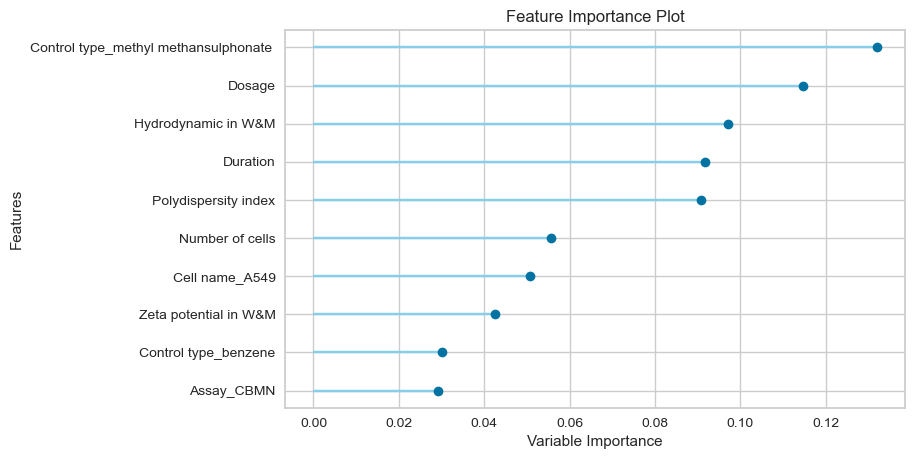

In [23]:
rf= create_model('rf')
plot_model(rf, plot = 'feature', use_train_data = True)

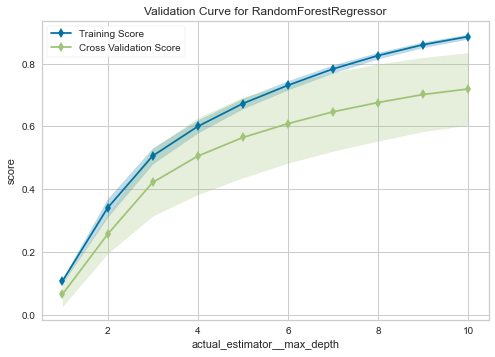

In [24]:
plot_model(rf, plot = 'vc', use_train_data = True)

In [26]:
en= create_model('en')
predict_model(en)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.2879,117.9912,10.8624,0.0961,0.9452,8.4179
1,7.9701,117.7762,10.8525,0.2069,1.1093,4.3938
2,8.2171,142.4746,11.9363,0.2443,0.9643,3.2057
3,6.9148,98.7784,9.9387,0.1241,1.0377,3.6744
4,7.5462,148.5098,12.1865,0.0054,1.0308,2.4040
5,8.5034,209.6416,14.4790,0.0703,1.0614,5.2407
6,9.3282,188.0584,13.7134,0.0368,1.0569,3.6894
7,7.0829,133.8008,11.5672,0.1896,1.0034,4.5141
8,8.8882,205.8926,14.3490,-0.0072,1.1960,9.4442
9,7.9943,160.4784,12.6680,0.1787,0.9680,3.9057


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,7.8059,142.696106,11.9455,0.0718,1.0594,4.1803


,Core size,Hydrodynamic in W&M,Specific surface area,Polydispersity index,Zeta potential in W&M,Dosage,Duration,Number of cells,Crystaline form_anatase,Crystaline form_anatase/rutile,...,Cell organ_kidney,Cell organ_lung,Cell organ_others,Cell age_adult,Cell age_fetus,Cell age_not_available,Cell age_young,Cell type (primarycarcinoma)_carcinoma,Percentage of DNA breakage,Label
0,12.000000,390.742676,73.00000,0.374547,-12.678175,200.0,24.0,10000000.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,11.970653
1,12.400000,2266.500000,150.00000,0.500000,-12.678175,50.0,720.0,1000.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,30.0,17.682186
2,55.000000,390.742676,52.68433,0.374547,-12.678175,50.0,0.5,1000.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,25.0,9.018697
3,24.000000,193.000000,46.00000,0.150000,-11.200000,1.0,1460.0,10000.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.9,27.517582
4,5.000000,845.750000,52.68433,0.480000,15.300000,133.0,48.0,12500.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.9,16.206732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,6.500000,399.000000,316.00000,0.460000,-9.200000,1.0,3.0,3130.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,5.110383
461,21.700001,344.850006,52.68433,0.470000,-19.500000,10.0,504.0,14700.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,13.0,14.182955
462,25.000000,223.000000,46.00000,0.170000,-18.150000,10.0,3.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,7.971685
463,50.000000,51.000000,52.68433,0.374547,9.380000,1000.0,48.0,50000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,36.0,31.240784


In [27]:
rf= create_model('rf')
predict_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.2958,36.7644,6.0634,0.7184,0.5025,1.7207
1,3.2592,37.2418,6.1026,0.7492,0.4957,0.7816
2,4.0896,41.4976,6.4419,0.7799,0.6042,1.0468
3,3.6240,37.2071,6.0998,0.6701,0.6727,1.3103
4,3.8626,44.2121,6.6492,0.7039,0.5978,0.7734
5,3.5932,44.2579,6.6527,0.8037,0.4498,0.8082
6,3.7720,44.2676,6.6534,0.7733,0.4930,1.0474
7,2.9414,23.4630,4.8439,0.8579,0.4540,0.9844
8,4.5164,109.6275,10.4703,0.4637,0.6413,1.2910
9,2.4747,16.8860,4.1093,0.9136,0.4748,1.2062


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,3.315,32.0425,5.6606,0.7916,0.5515,0.9986


,Core size,Hydrodynamic in W&M,Specific surface area,Polydispersity index,Zeta potential in W&M,Dosage,Duration,Number of cells,Crystaline form_anatase,Crystaline form_anatase/rutile,...,Cell organ_kidney,Cell organ_lung,Cell organ_others,Cell age_adult,Cell age_fetus,Cell age_not_available,Cell age_young,Cell type (primarycarcinoma)_carcinoma,Percentage of DNA breakage,Label
0,12.000000,390.742676,73.00000,0.374547,-12.678175,200.0,24.0,10000000.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.648500
1,12.400000,2266.500000,150.00000,0.500000,-12.678175,50.0,720.0,1000.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,30.0,25.373571
2,55.000000,390.742676,52.68433,0.374547,-12.678175,50.0,0.5,1000.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,25.0,21.824667
3,24.000000,193.000000,46.00000,0.150000,-11.200000,1.0,1460.0,10000.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.9,8.529833
4,5.000000,845.750000,52.68433,0.480000,15.300000,133.0,48.0,12500.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.9,3.661000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,6.500000,399.000000,316.00000,0.460000,-9.200000,1.0,3.0,3130.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,9.148833
461,21.700001,344.850006,52.68433,0.470000,-19.500000,10.0,504.0,14700.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,13.0,14.111500
462,25.000000,223.000000,46.00000,0.170000,-18.150000,10.0,3.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,5.904933
463,50.000000,51.000000,52.68433,0.374547,9.380000,1000.0,48.0,50000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,36.0,37.197719


In [28]:
lightgbm= create_model('lightgbm')
predict_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.7255,38.3201,6.1903,0.7064,0.5427,2.0557
1,3.7784,41.0523,6.4072,0.7236,0.5380,0.9582
2,4.9888,50.7800,7.1260,0.7306,0.6742,1.3114
3,3.8676,40.9048,6.3957,0.6373,0.6732,1.1728
4,4.2679,50.8449,7.1306,0.6595,0.6315,0.8265
5,4.0485,68.8194,8.2957,0.6948,0.4875,0.9834
6,4.5901,51.8620,7.2015,0.7344,0.6380,1.3220
7,3.9693,36.9766,6.0808,0.7761,0.5738,1.4738
8,5.0011,106.9663,10.3425,0.4767,0.7032,1.6060
9,2.8874,22.8994,4.7853,0.8828,0.5222,1.1684


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,3.6754,36.4285,6.0356,0.763,0.5937,1.0186


,Core size,Hydrodynamic in W&M,Specific surface area,Polydispersity index,Zeta potential in W&M,Dosage,Duration,Number of cells,Crystaline form_anatase,Crystaline form_anatase/rutile,...,Cell organ_kidney,Cell organ_lung,Cell organ_others,Cell age_adult,Cell age_fetus,Cell age_not_available,Cell age_young,Cell type (primarycarcinoma)_carcinoma,Percentage of DNA breakage,Label
0,12.000000,390.742676,73.00000,0.374547,-12.678175,200.0,24.0,10000000.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.797790
1,12.400000,2266.500000,150.00000,0.500000,-12.678175,50.0,720.0,1000.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,30.0,25.342407
2,55.000000,390.742676,52.68433,0.374547,-12.678175,50.0,0.5,1000.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,25.0,19.534422
3,24.000000,193.000000,46.00000,0.150000,-11.200000,1.0,1460.0,10000.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.9,13.296640
4,5.000000,845.750000,52.68433,0.480000,15.300000,133.0,48.0,12500.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.9,0.824390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,6.500000,399.000000,316.00000,0.460000,-9.200000,1.0,3.0,3130.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,8.819512
461,21.700001,344.850006,52.68433,0.470000,-19.500000,10.0,504.0,14700.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,13.0,15.182465
462,25.000000,223.000000,46.00000,0.170000,-18.150000,10.0,3.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,5.414737
463,50.000000,51.000000,52.68433,0.374547,9.380000,1000.0,48.0,50000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,36.0,33.631572


In [29]:
gbr= create_model('gbr')
predict_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.5529,52.6099,7.2533,0.5970,0.6354,2.1194
1,4.3683,49.9282,7.0660,0.6638,0.6580,1.3734
2,5.7783,66.2156,8.1373,0.6488,0.7735,1.8978
3,4.5941,40.4201,6.3577,0.6416,0.7591,1.6741
4,4.9898,46.4526,6.8156,0.6889,0.7660,1.3557
5,4.4782,43.7346,6.6132,0.8061,0.5995,1.4401
6,5.1023,71.6958,8.4673,0.6328,0.6624,1.7252
7,4.1002,34.2938,5.8561,0.7923,0.6873,2.0947
8,5.7048,121.1230,11.0056,0.4075,0.8093,2.7230
9,4.5294,32.9919,5.7439,0.8312,0.6704,2.1567


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,4.3603,38.6507,6.217,0.7486,0.6971,1.6747


,Core size,Hydrodynamic in W&M,Specific surface area,Polydispersity index,Zeta potential in W&M,Dosage,Duration,Number of cells,Crystaline form_anatase,Crystaline form_anatase/rutile,...,Cell organ_kidney,Cell organ_lung,Cell organ_others,Cell age_adult,Cell age_fetus,Cell age_not_available,Cell age_young,Cell type (primarycarcinoma)_carcinoma,Percentage of DNA breakage,Label
0,12.000000,390.742676,73.00000,0.374547,-12.678175,200.0,24.0,10000000.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.213977
1,12.400000,2266.500000,150.00000,0.500000,-12.678175,50.0,720.0,1000.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,30.0,25.473514
2,55.000000,390.742676,52.68433,0.374547,-12.678175,50.0,0.5,1000.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,25.0,11.894339
3,24.000000,193.000000,46.00000,0.150000,-11.200000,1.0,1460.0,10000.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.9,3.801296
4,5.000000,845.750000,52.68433,0.480000,15.300000,133.0,48.0,12500.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.9,5.995738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,6.500000,399.000000,316.00000,0.460000,-9.200000,1.0,3.0,3130.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,7.606114
461,21.700001,344.850006,52.68433,0.470000,-19.500000,10.0,504.0,14700.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,13.0,11.565526
462,25.000000,223.000000,46.00000,0.170000,-18.150000,10.0,3.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,4.599259
463,50.000000,51.000000,52.68433,0.374547,9.380000,1000.0,48.0,50000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,36.0,34.201383


In [30]:
dt= create_model('dt')
predict_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.0615,53.9521,7.3452,0.5867,0.5990,0.7373
1,3.3345,47.9020,6.9211,0.6774,0.5844,0.7582
2,4.2056,50.9913,7.1408,0.7295,0.6843,0.9307
3,3.8894,57.9533,7.6127,0.4861,0.6636,0.9537
4,4.1873,63.1410,7.9461,0.5771,0.6231,0.6236
5,4.0140,40.2249,6.3423,0.8216,0.4861,0.5441
6,4.6433,83.6439,9.1457,0.5716,0.6724,1.1452
7,4.3505,71.4705,8.4540,0.5671,0.7226,0.5436
8,5.4792,141.4218,11.8921,0.3082,0.8365,1.1613
9,2.7537,23.5851,4.8564,0.8793,0.5732,1.1602


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,3.3986,37.9625,6.1614,0.7531,0.5539,0.7855


,Core size,Hydrodynamic in W&M,Specific surface area,Polydispersity index,Zeta potential in W&M,Dosage,Duration,Number of cells,Crystaline form_anatase,Crystaline form_anatase/rutile,...,Cell organ_kidney,Cell organ_lung,Cell organ_others,Cell age_adult,Cell age_fetus,Cell age_not_available,Cell age_young,Cell type (primarycarcinoma)_carcinoma,Percentage of DNA breakage,Label
0,12.000000,390.742676,73.00000,0.374547,-12.678175,200.0,24.0,10000000.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.31
1,12.400000,2266.500000,150.00000,0.500000,-12.678175,50.0,720.0,1000.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,30.0,25.00
2,55.000000,390.742676,52.68433,0.374547,-12.678175,50.0,0.5,1000.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,25.0,24.00
3,24.000000,193.000000,46.00000,0.150000,-11.200000,1.0,1460.0,10000.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.9,1.40
4,5.000000,845.750000,52.68433,0.480000,15.300000,133.0,48.0,12500.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.9,4.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,6.500000,399.000000,316.00000,0.460000,-9.200000,1.0,3.0,3130.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,12.50
461,21.700001,344.850006,52.68433,0.470000,-19.500000,10.0,504.0,14700.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,13.0,14.00
462,25.000000,223.000000,46.00000,0.170000,-18.150000,10.0,3.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,5.00
463,50.000000,51.000000,52.68433,0.374547,9.380000,1000.0,48.0,50000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,36.0,50.00
